In [ ]:
# this will help in making the Python code more structured automatically
# %load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 300)



# import train_test_split library

from sklearn.model_selection import train_test_split


# import libraries
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To build model for prediction
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)


# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.model_selection import GridSearchCV

In [ ]:
# Read Data 

from google.colab import files
uploaded = files.upload()


import io
debt = pd.read_csv(io.BytesIO(uploaded['account_train_(1).csv']))
debt_test = pd.read_csv(io.BytesIO(uploaded['account_test_(1).csv']))


# copying orignal data so that when changing data we dont lose original
data = debt.copy()
data_validation = debt_test.copy()

Saving account_train_(1).csv to account_train_(1) (3).csv
Saving account_test_(1).csv to account_test_(1) (3).csv


In [ ]:
# copying orignal data so that when changing data we dont lose original
data = debt.copy()
data_validation = debt_test.copy()

print(f'data(train) shape after reading csv :  {data.shape}')
print(f'data_validation(test) shape after reading csv :  {data_validation.shape}')

data(train) shape after reading csv :  (100476, 16)
data_validation(test) shape after reading csv :  (33493, 15)


In [ ]:
# Drop CategoryID, AccID,CollectionRatio,DebtBillingRatio   Columns - we can use Category in future
data.drop(["AccID","CategoryID"], axis=1, inplace=True)
data_validation.drop(["AccID","CategoryID"], axis=1, inplace=True)

In [ ]:
# create a list those columns should be converted as category

cat_vars = ["Category"]

for colname in cat_vars:
    data[colname] = data[colname].astype("category")
    data_validation[colname] = data[colname].astype("category")


In [ ]:
#data['Value_Missing'] = np.where(data['Value']> 0, 0, 1)
#data['PropertySize_Missing'] = np.where(data['PropertySize']> 0, 0, 1)
#data['Has_DebtAmt'] = np.where(data['DebtAmt']> 0, 1, 0)
#data['Has_WriteOffAmt'] = np.where(data['WriteOffAmt']> 0, 1, 0)
#data['Has_DebtBillingRatio'] = np.where(data['DebtBillingRatio']> 1, 1, 0)
#data['Has_CollectionRatio'] = np.where(data['CollectionRatio']> 1, 1, 0)
#data['Has_ElectricityBill'] = np.where(data['TotalElectricityBill']> 0, 1, 0)


#data['Has_Pending_Amount'] =np.where((data['BillingAmt'] - data['CollectedAmt'])> 0, 1, 0)
#data['Has_Avg_Difference'] =np.where((data['AverageBillingAmt'] - data['AverageCollectedAmt'])> 0, 1, 0)
#data['Pending_Amount_divided'] = data['BillingAmt'] / data['CollectedAmt'];
#data['Avg_Difference_divided'] = data['AverageBillingAmt'] / data['AverageCollectedAmt'];

#data['Amt_diff'] = np.where((data['CollectedAmt'] - data['BillingAmt'])> 0, 1, 0)
#data['Average_diff'] = np.where((data['AverageCollectedAmt'] - data['AverageBillingAmt'])> 0, 1, 0)




#data_validation['Value_Missing'] = np.where(data_validation['Value']> 0, 0, 1)
#data_validation['PropertySize_Missing'] = np.where(data_validation['PropertySize']> 0, 0, 1)
#data_validation['Has_DebtAmt'] = np.where(data_validation['DebtAmt']> 0, 1, 0)
#data_validation['Has_WriteOffAmt'] = np.where(data_validation['WriteOffAmt']> 0, 1, 0)
#data_validation['Has_DebtBillingRatio'] = np.where(data_validation['DebtBillingRatio']> 0, 1, 0)
#data_validation['Has_CollectionRatio'] = np.where(data_validation['CollectionRatio']> 0, 1, 0)
#data_validation['Has_ElectricityBill'] = np.where(data_validation['TotalElectricityBill']> 0, 1, 0)

#data_validation['Has_Pending_Amount'] =np.where((data_validation['BillingAmt'] - data_validation['CollectedAmt'])> 0, 1, 0)
#data_validation['Has_Avg_Difference'] =np.where((data_validation['AverageBillingAmt'] - data_validation['AverageCollectedAmt'])> 0, 1, 0)
#data_validation['Pending_Amount_divided'] = data_validation['BillingAmt'] / data_validation['CollectedAmt'];
#data_validation['Avg_Difference_divided'] = data_validation['AverageBillingAmt'] / data_validation['AverageCollectedAmt'];

#data_validation['BillingAmt_diff'] = np.where((data_validation['AverageBillingAmt'] - data_validation['BillingAmt'])> 0, 1, 0)
#data_validation['Collected_diff'] = np.where((data_validation['AverageCollectedAmt'] - data_validation['CollectedAmt'])> 0, 1, 0)


#cols_to_drp = ["DebtAmt", "WriteOffAmt","DebtBillingRatio","CollectionRatio","TotalElectricityBill","AverageCollectedAmt","AverageBillingAmt","BillingAmt","CollectedAmt"]

"""
cols_to_drp = ["TotalElectricityBill","BillingAmt","CollectedAmt","AverageCollectedAmt","AverageBillingAmt"]
data.drop(cols_to_drp, axis=1, inplace=True)
data_validation.drop(cols_to_drp, axis=1, inplace=True)
#data.sample(10)
"""


## Handle Negative value 
data['BillingAmt'] = np.where((data['BillingAmt']<= 0), 0, data['BillingAmt'])
data['AverageBillingAmt'] = np.where((data['AverageBillingAmt']<= 0), 0, data['AverageBillingAmt'])
data['CollectedAmt'] = np.where((data['CollectedAmt']<= 0), 0, data['CollectedAmt'])
data['AverageCollectedAmt'] = np.where((data['AverageCollectedAmt']<= 0), 0, data['AverageCollectedAmt'])
data['CollectionRatio'] = np.where((data['CollectionRatio']<= 0), 0, data['CollectionRatio'])
data['DebtBillingRatio'] = np.where((data['DebtBillingRatio']<= 0), 0, data['DebtBillingRatio'])
data['TotalElectricityBill'] = np.where((data['TotalElectricityBill']<= 0), 0, data['TotalElectricityBill'])


data_validation['BillingAmt'] = np.where((data_validation['BillingAmt']<= 0), 0, data_validation['BillingAmt'])
data_validation['AverageBillingAmt'] = np.where((data_validation['AverageBillingAmt']<= 0), 0, data_validation['AverageBillingAmt'])
data_validation['CollectedAmt'] = np.where((data_validation['CollectedAmt']<= 0), 0, data_validation['CollectedAmt'])
data_validation['AverageCollectedAmt'] = np.where((data_validation['AverageCollectedAmt']<= 0), 0, data_validation['AverageCollectedAmt'])
data_validation['CollectionRatio'] = np.where((data_validation['CollectionRatio']<= 0), 0, data_validation['CollectionRatio'])
data_validation['DebtBillingRatio'] = np.where((data_validation['DebtBillingRatio']<= 0), 0, data_validation['DebtBillingRatio'])
data_validation['TotalElectricityBill'] = np.where((data_validation['TotalElectricityBill']<= 0), 0, data_validation['TotalElectricityBill'])
"""
cols_to_drp = ["DebtAmt","WriteOffAmt","DebtBillingRatio"]
data.drop(cols_to_drp, axis=1, inplace=True)
data_validation.drop(cols_to_drp, axis=1, inplace=True)
#data.sample(10)
"""


data.describe().T

,count,mean,std,min,25%,50%,75%,max
Value,100476.0,707020.754379,3.047463e+06,0.0,35000.0,93000.0,750000.00,421860000.0
PropertySize,100476.0,746822.707124,5.651558e+06,0.0,276.0,511.0,1162.00,270515963.0
BillingAmt,100476.0,11258.346839,1.253533e+05,0.0,461.0,3141.0,8715.00,26133617.0
AverageBillingAmt,100476.0,604.714101,6.400668e+03,0.0,23.0,107.0,281.00,805044.0
CollectedAmt,100476.0,9769.963882,1.201416e+05,0.0,0.0,360.0,7402.25,24371134.0
AverageCollectedAmt,100476.0,2048.999273,3.681728e+04,0.0,0.0,100.0,768.00,6828297.0
DebtAmt,100476.0,9642.500070,5.003013e+04,0.0,0.0,0.0,2298.00,6322610.0
WriteOffAmt,100476.0,602.765327,1.440915e+04,0.0,0.0,0.0,0.00,4306605.0
CollectionRatio,100476.0,25.689197,5.519402e+03,0.0,0.0,0.5,1.00,1701912.0
DebtBillingRatio,100476.0,32.456573,5.932453e+03,0.0,0.0,0.0,1.28,1836304.0


In [ ]:
"""
#cols_to_change_neg_values = ["BillingAmt","AverageBillingAmt","CollectedAmt","AverageCollectedAmt","TotalElectricityBill"]
cols_to_change_neg_values = ["BillingAmt","AverageBillingAmt","CollectedAmt","AverageCollectedAmt","CollectionRatio","DebtBillingRatio","TotalElectricityBill"]
for colname in cols_to_change_neg_values:
  data[colname] = np.where(data[colname]  <=0, 0, data[colname])
  data_validation[colname] = np.where(data_validation[colname]  <=0, 0, data_validation[colname])

"""


'\n#cols_to_change_neg_values = ["BillingAmt","AverageBillingAmt","CollectedAmt","AverageCollectedAmt","TotalElectricityBill"]\ncols_to_change_neg_values = ["BillingAmt","AverageBillingAmt","CollectedAmt","AverageCollectedAmt","CollectionRatio","DebtBillingRatio","TotalElectricityBill"]\nfor colname in cols_to_change_neg_values:\n  data[colname] = np.where(data[colname]  <=0, 0, data[colname])\n  data_validation[colname] = np.where(data_validation[colname]  <=0, 0, data_validation[colname])\n\n'

# Feature Engineering






*   BillingAmt, AverageBillingAmt - these lets convert to abs value to change negative to positive 




In [ ]:
"""
cols_to_abs = ["BillingAmt","AverageBillingAmt","CollectedAmt","AverageCollectedAmt","TotalElectricityBill"]
for colname in cols_to_abs:
  data[colname] = abs(data[colname])
  data_validation[colname] = abs(data_validation[colname])
"""

'\ncols_to_abs = ["BillingAmt","AverageBillingAmt","CollectedAmt","AverageCollectedAmt","TotalElectricityBill"]\nfor colname in cols_to_abs:\n  data[colname] = abs(data[colname])\n  data_validation[colname] = abs(data_validation[colname])\n'

## Lets fix Property Value & Size

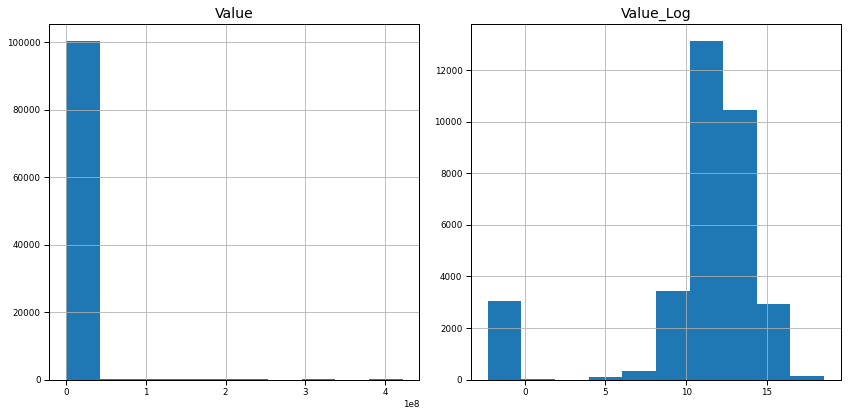

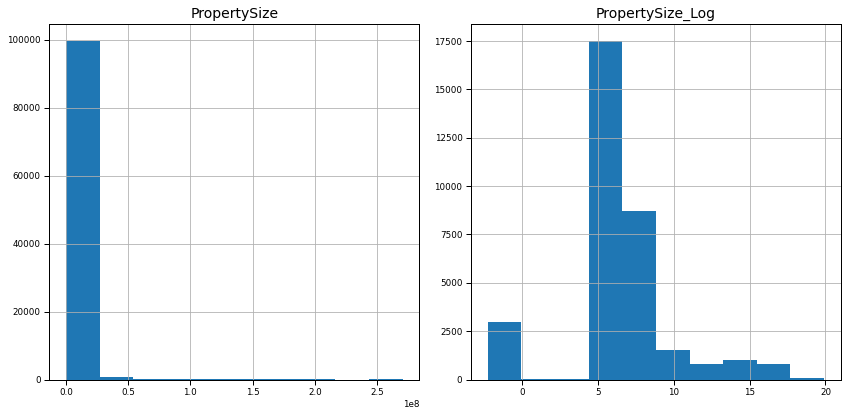

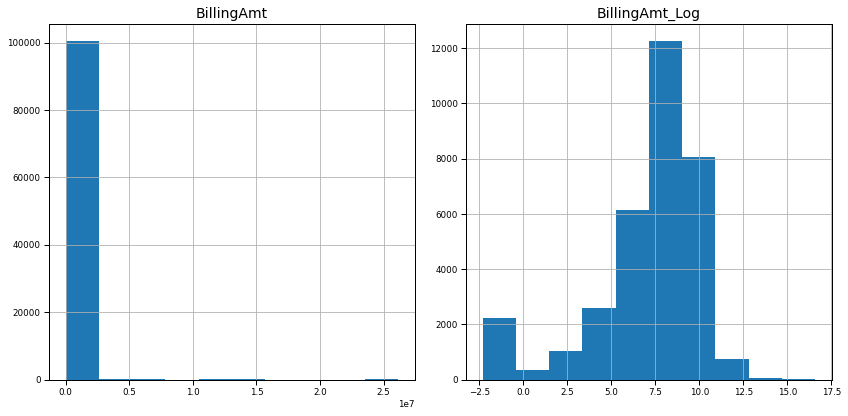

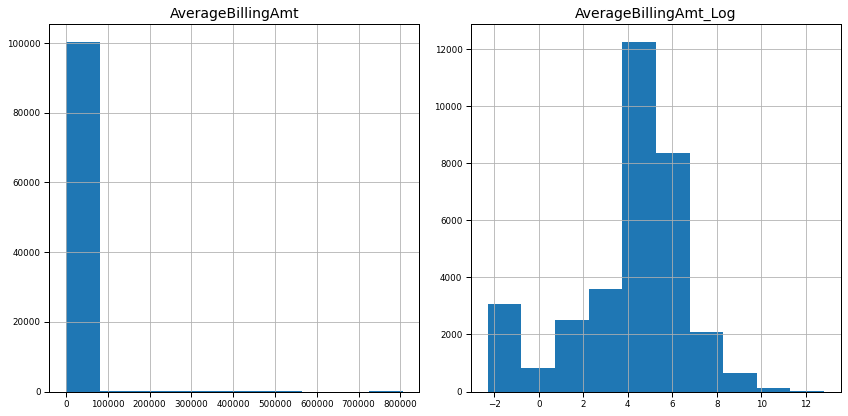

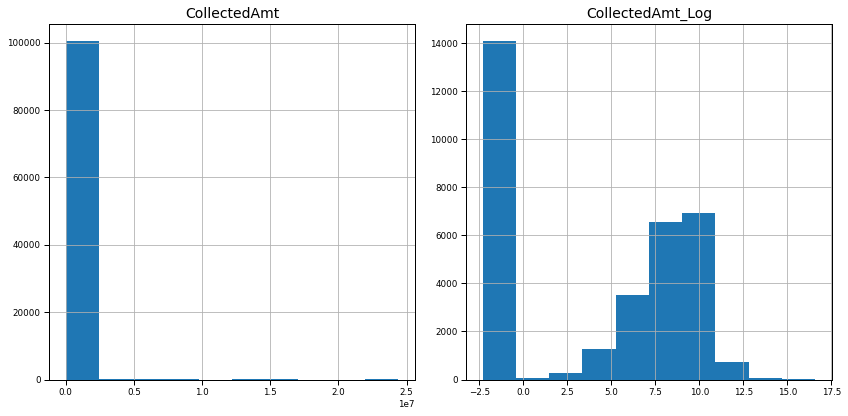

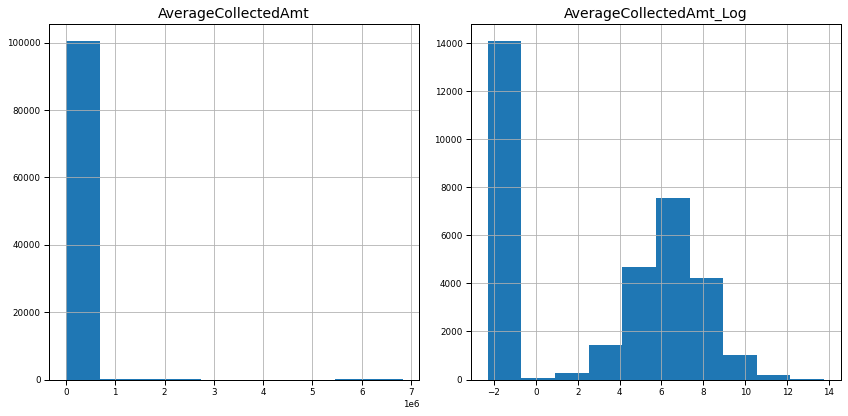

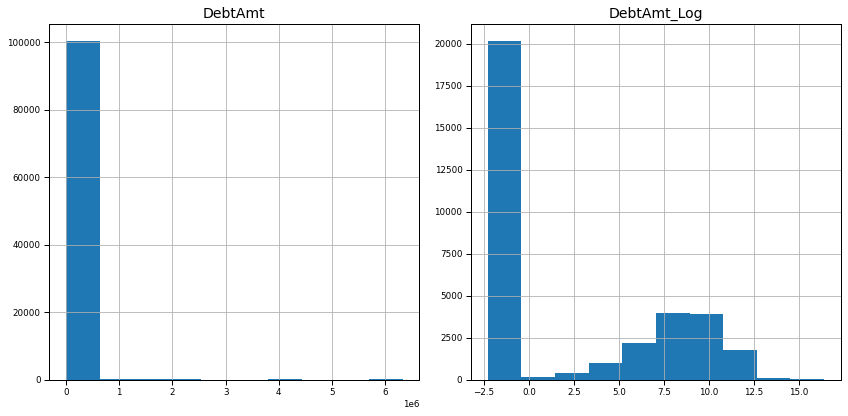

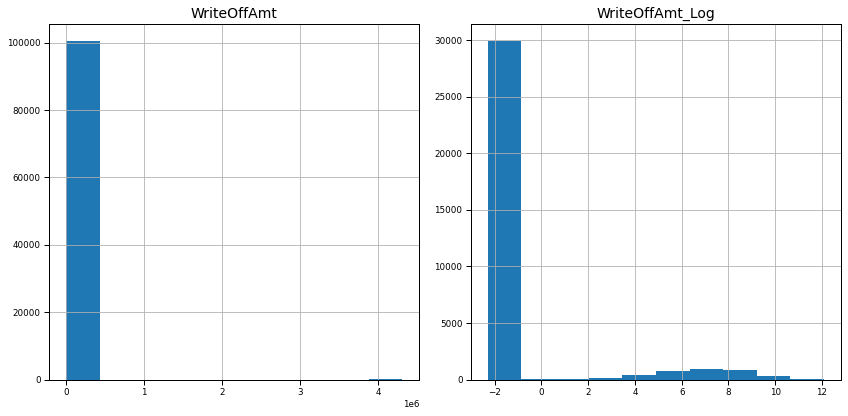

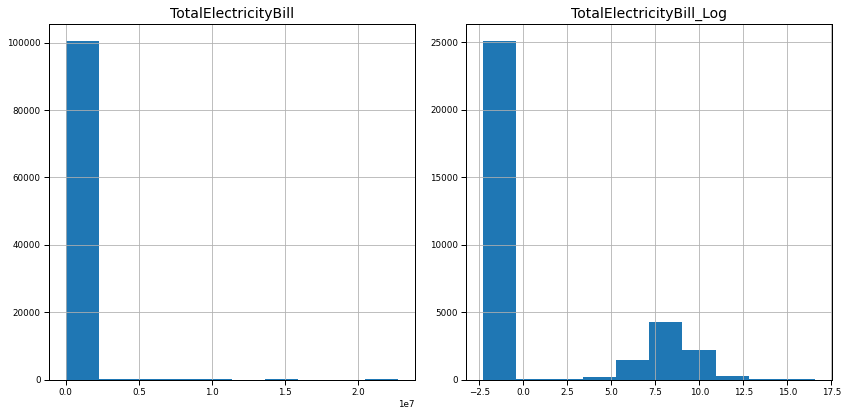

In [ ]:

#cols_to_log = ["Value", "PropertySize","BillingAmt","AverageBillingAmt","CollectedAmt","AverageCollectedAmt","DebtAmt","WriteOffAmt"]
cols_to_log =["Value", "PropertySize","BillingAmt","AverageBillingAmt","CollectedAmt","AverageCollectedAmt","DebtAmt","WriteOffAmt","TotalElectricityBill"]
for colname in cols_to_log:

  # lets convert this to log to normalize distribution 
  data[colname+'_Log'] = np.log((data[colname]+1))
  data_validation[colname+'_Log'] = np.log((data_validation[colname]+0.1))
  fig, axes = plt.subplots(1,2)
  plot1 = data.hist(colname, ax=axes[0])
  plot2 = data_validation.hist(colname+'_Log', ax=axes[1])

data.drop(cols_to_log, axis=1, inplace=True)
data_validation.drop(cols_to_log, axis=1, inplace=True)


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CollectionRatio,100476.0,25.689197,5519.401942,0.0,0.000000,0.500000,1.000000,1.701912e+06
DebtBillingRatio,100476.0,32.456573,5932.452622,0.0,0.000000,0.000000,1.280000,1.836304e+06
HasID,100476.0,0.427634,0.494738,0.0,0.000000,0.000000,1.000000,1.000000e+00
Label,100476.0,0.461424,0.498512,0.0,0.000000,0.000000,1.000000,1.000000e+00
Value_Log,100476.0,10.983147,3.864663,0.0,10.463132,11.440366,13.527830,1.986018e+01
PropertySize_Log,100476.0,6.587369,3.228847,0.0,5.624018,6.238325,7.058758,1.941584e+01
BillingAmt_Log,100476.0,7.255947,2.798885,0.0,6.135565,8.052615,9.072916,1.707873e+01
AverageBillingAmt_Log,100476.0,4.297021,2.137622,0.0,3.178054,4.682131,5.641907,1.359865e+01
CollectedAmt_Log,100476.0,4.749913,4.324267,0.0,0.000000,5.888878,8.909674,1.700891e+01
AverageCollectedAmt_Log,100476.0,3.690601,3.405340,0.0,0.000000,4.615121,6.645091,1.573659e+01


# Feature using TotalElectricityBill
The total amount billed for electricity. This field was put in place because it is used as a means to recover debt - ie. If an amount is outstanding for any service the management has the right to cut a consumer's electricity connection.

In [ ]:
"""
data['ElectricityBill_IND'] = np.where(data['TotalElectricityBill_Log']> 0, 'Y', 'N')
data_validation['ElectricityBill_IND'] = np.where(data_validation['TotalElectricityBill_Log']> 0, 'Y', 'N')


data.drop(['TotalElectricityBill_Log'], axis=1, inplace=True)
data_validation.drop(['TotalElectricityBill_Log'], axis=1, inplace=True)

"""

"\ndata['ElectricityBill_IND'] = np.where(data['TotalElectricityBill_Log']> 0, 'Y', 'N')\ndata_validation['ElectricityBill_IND'] = np.where(data_validation['TotalElectricityBill_Log']> 0, 'Y', 'N')\n\n\ndata.drop(['TotalElectricityBill_Log'], axis=1, inplace=True)\ndata_validation.drop(['TotalElectricityBill_Log'], axis=1, inplace=True)\n\n"

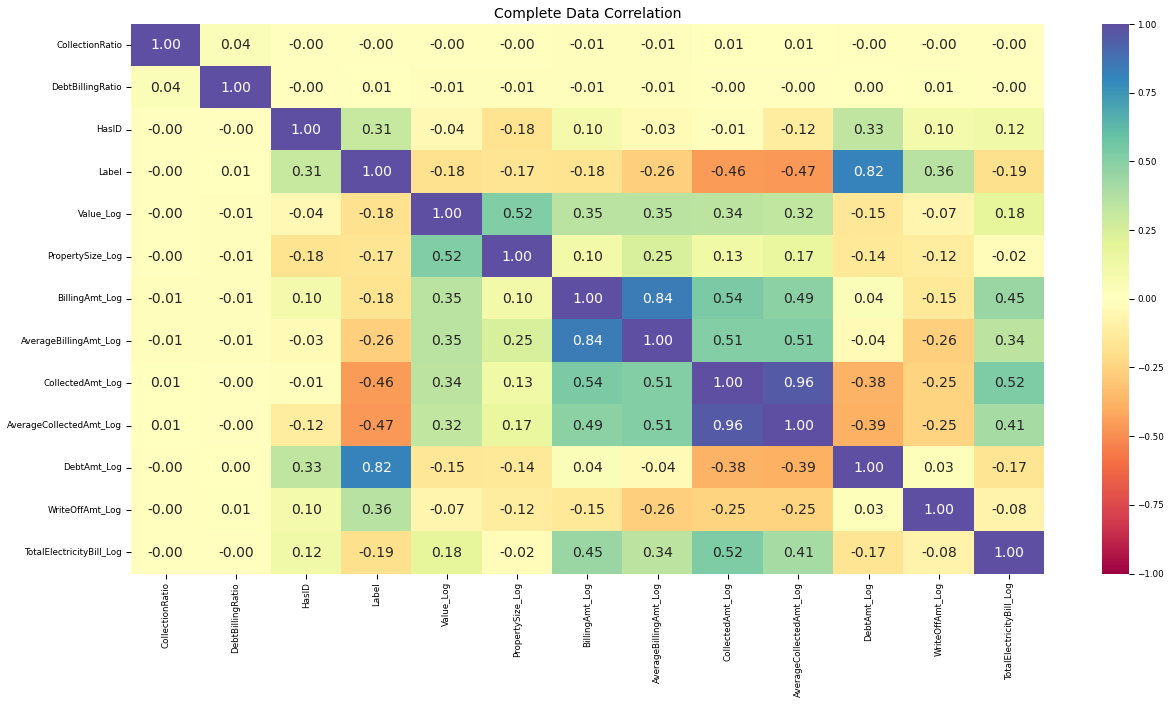

In [ ]:
plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral").set_title("Complete Data Correlation")
plt.show()

# Exploratory Data Analysis

In [ ]:
## building a Common method to generate graphs


def generate_univariate_chart(data, feature, hue=None, kde=False, bins=20):
    """
    Builds histplot and boxplot for given field.
    Can plot hue, kde and bins based on params, these are optional columns
    """

    sns.set_style("darkgrid")
    print(f"Genrating Charts for feature : {feature}")
    # sns.set_context('poster',font_scale=1)
    # figsize(width,height)

    fig, axes = plt.subplots(2, figsize=(15, 15))
    fig.suptitle("Univariate analysis for " + feature)

    sns.histplot(
        data=data,
        x=feature,
        ax=axes[0],
        palette="winter",
        bins=bins,
        kde=kde,
        hue=hue,
        multiple="dodge",
    )
    sns.boxplot(
        data=data, x=feature, ax=axes[1], showmeans=True, color="violet", hue=hue
    )


# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    print(f"Genrating Bar Plots for feature : {feature}")
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 10))
    else:
        plt.figure(figsize=(n + 1, 10))

    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=15,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    """
    function to plot distributions wrt target
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()


# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter
    )
    print(tab1)
    print("-" * 100)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


## this method generate joint plot of x vs y feature
def generate_bivariate_chart(data, xfeature, yfeature, hue=None):
    """
    common method to generate joint plot for various columns
    hue param is optional
    """
    sns.set_style("darkgrid")
    print(f"Genrating Charts for feature x : {xfeature}, y : {yfeature}")

    sns.jointplot(
        data=data,
        x=xfeature,
        y=yfeature,
        palette="winter",
        height=10,
        kind="scatter",
        hue=hue,
    )

In [ ]:
#labeled_barplot(data=data, feature="Label", perc=True)
#stacked_barplot(data, "ElectricityBill_IND", "Label")


In [ ]:
#labeled_barplot(data=data, feature="HasID", perc=True)
#stacked_barplot(data, "HasID", "Label")

In [ ]:
#labeled_barplot(data=data, feature="Category", perc=True)
#stacked_barplot(data, "Category", "Label")

In [ ]:
"""
cols = data[['Value_Log','PropertySize_Log','BillingAmt_Log','AverageBillingAmt_Log']].columns.tolist()
plt.figure(figsize=(20,20))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Label"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

"""

'\ncols = data[[\'Value_Log\',\'PropertySize_Log\',\'BillingAmt_Log\',\'AverageBillingAmt_Log\']].columns.tolist()\nplt.figure(figsize=(20,20))\n\nfor i, variable in enumerate(cols):\n                     plt.subplot(3,2,i+1)\n                     sns.boxplot(data["Label"],data[variable],palette="PuBu")\n                     plt.tight_layout()\n                     plt.title(variable)\nplt.show()\n\n'

In [ ]:
"""
cols = data[['CollectedAmt_Log',"AverageCollectedAmt_Log","DebtAmt_Log","WriteOffAmt_Log"]].columns.tolist()
plt.figure(figsize=(20,20))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Label"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()
"""

'\ncols = data[[\'CollectedAmt_Log\',"AverageCollectedAmt_Log","DebtAmt_Log","WriteOffAmt_Log"]].columns.tolist()\nplt.figure(figsize=(20,20))\n\nfor i, variable in enumerate(cols):\n                     plt.subplot(3,2,i+1)\n                     sns.boxplot(data["Label"],data[variable],palette="PuBu")\n                     plt.tight_layout()\n                     plt.title(variable)\nplt.show()\n'

## delete fetures not impacting much



In [ ]:
"""
data.drop(['WriteOffAmt_Log'], axis=1, inplace=True)
data_validation.drop(['WriteOffAmt_Log'], axis=1, inplace=True)
"""

"\ndata.drop(['WriteOffAmt_Log'], axis=1, inplace=True)\ndata_validation.drop(['WriteOffAmt_Log'], axis=1, inplace=True)\n"

In [ ]:
#data[(data['PropertySize_Log']==0) & (data['Value_Log']==0)].sample(20)

#data[(data['BillingAmt']<=0)].sample(20)



In [ ]:
data.sample(10)

,Category,CollectionRatio,DebtBillingRatio,HasID,Label,Value_Log,PropertySize_Log,BillingAmt_Log,AverageBillingAmt_Log,CollectedAmt_Log,AverageCollectedAmt_Log,DebtAmt_Log,WriteOffAmt_Log,TotalElectricityBill_Log
53987,Agricultural,1.02,0.01,0,1,11.608245,12.367724,6.645091,4.094345,6.661855,5.968708,1.945910,0.0,0.000000
79010,Agricultural,1.00,0.00,0,0,13.943905,15.013823,5.429346,4.060443,5.429346,5.429346,0.000000,0.0,0.000000
44363,Residential,0.00,0.00,1,0,10.736418,5.768321,6.222576,2.197225,0.000000,0.000000,0.000000,0.0,0.000000
5600,Residential,1.10,0.00,0,0,10.295563,0.000000,6.042633,1.791759,6.133398,6.133398,0.000000,0.0,0.000000
36317,Residential,0.00,0.00,0,0,10.434145,5.655992,1.791759,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
82062,Residential,1.06,0.00,0,0,13.931515,7.065613,9.615739,5.525453,9.674011,7.372118,0.000000,0.0,7.802209
21980,Residential,0.59,0.59,0,1,12.706851,6.480045,8.547916,4.682131,8.023225,6.415097,8.017308,0.0,0.000000
12472,Place of Worship,0.83,0.00,0,0,13.977375,6.846943,9.259987,4.836282,9.071538,7.462789,0.000000,0.0,0.000000
70208,Government,0.00,0.00,0,1,14.457365,11.776466,0.000000,0.000000,0.000000,0.000000,9.436440,0.0,0.000000
30735,Agricultural,0.00,0.00,0,0,12.593038,14.321902,4.997212,4.997212,0.000000,0.000000,0.000000,0.0,0.000000


In [ ]:
data_validation.sample(10)

,Category,CollectionRatio,DebtBillingRatio,HasID,Value_Log,PropertySize_Log,BillingAmt_Log,AverageBillingAmt_Log,CollectedAmt_Log,AverageCollectedAmt_Log,DebtAmt_Log,WriteOffAmt_Log,TotalElectricityBill_Log
14115,Residential,0.25,4.53,1,-2.302585,-2.302585,7.698982,4.096010,6.326328,3.763523,9.209050,-2.302585,-2.302585
22528,Business,0.99,0.00,1,13.664688,6.423409,9.375524,6.157191,9.366155,6.188469,-2.302585,-2.302585,-2.302585
854,Residential,0.00,42.12,1,-2.302585,9.132173,5.136386,2.646175,-2.302585,-2.302585,8.876698,-2.302585,-2.302585
27873,Residential,0.14,1.93,1,13.398175,-2.302585,9.140465,4.710431,7.170196,6.477126,9.795741,-2.302585,-2.302585
33365,Unknown,1.00,0.00,0,12.940842,-2.302585,5.342813,5.342813,5.342813,5.342813,-2.302585,-2.302585,-2.302585
32065,Residential,0.09,0.99,0,13.287878,13.381763,7.073354,7.073354,4.719391,4.719391,7.062277,-2.302585,-2.302585
16223,Residential,0.00,11.76,0,11.082144,6.411982,4.478473,0.095310,-2.302585,-2.302585,-2.302585,6.947072,-2.302585
4689,Residential,0.00,0.00,1,10.915090,5.481056,-2.302585,-2.302585,6.274950,3.786460,-2.302585,-2.302585,-2.302585
4443,Residential,0.00,0.00,0,10.819780,5.659831,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,5.533785,-2.302585
23847,Residential,1.72,0.11,1,-2.302585,-2.302585,8.520607,4.500920,9.065673,5.429784,6.310100,-2.302585,-2.302585


In [ ]:
data.shape

(100476, 14)

In [ ]:
data_validation.shape

(33493, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100476 entries, 0 to 100475
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Category                  100476 non-null  category
 1   CollectionRatio           100476 non-null  float64 
 2   DebtBillingRatio          100476 non-null  float64 
 3   HasID                     100476 non-null  int64   
 4   Label                     100476 non-null  int64   
 5   Value_Log                 100476 non-null  float64 
 6   PropertySize_Log          100476 non-null  float64 
 7   BillingAmt_Log            100476 non-null  float64 
 8   AverageBillingAmt_Log     100476 non-null  float64 
 9   CollectedAmt_Log          100476 non-null  float64 
 10  AverageCollectedAmt_Log   100476 non-null  float64 
 11  DebtAmt_Log               100476 non-null  float64 
 12  WriteOffAmt_Log           100476 non-null  float64 
 13  TotalElectricityBill_Log  100

In [ ]:
data_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33493 entries, 0 to 33492
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Category                  33493 non-null  category
 1   CollectionRatio           33493 non-null  float64 
 2   DebtBillingRatio          33493 non-null  float64 
 3   HasID                     33493 non-null  int64   
 4   Value_Log                 33493 non-null  float64 
 5   PropertySize_Log          33493 non-null  float64 
 6   BillingAmt_Log            33493 non-null  float64 
 7   AverageBillingAmt_Log     33493 non-null  float64 
 8   CollectedAmt_Log          33493 non-null  float64 
 9   AverageCollectedAmt_Log   33493 non-null  float64 
 10  DebtAmt_Log               33493 non-null  float64 
 11  WriteOffAmt_Log           33493 non-null  float64 
 12  TotalElectricityBill_Log  33493 non-null  float64 
dtypes: category(1), float64(11), int64(1)
memory u

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CollectionRatio,100476.0,25.689197,5519.401942,0.0,0.000000,0.500000,1.000000,1.701912e+06
DebtBillingRatio,100476.0,32.456573,5932.452622,0.0,0.000000,0.000000,1.280000,1.836304e+06
HasID,100476.0,0.427634,0.494738,0.0,0.000000,0.000000,1.000000,1.000000e+00
Label,100476.0,0.461424,0.498512,0.0,0.000000,0.000000,1.000000,1.000000e+00
Value_Log,100476.0,10.983147,3.864663,0.0,10.463132,11.440366,13.527830,1.986018e+01
PropertySize_Log,100476.0,6.587369,3.228847,0.0,5.624018,6.238325,7.058758,1.941584e+01
BillingAmt_Log,100476.0,7.255947,2.798885,0.0,6.135565,8.052615,9.072916,1.707873e+01
AverageBillingAmt_Log,100476.0,4.297021,2.137622,0.0,3.178054,4.682131,5.641907,1.359865e+01
CollectedAmt_Log,100476.0,4.749913,4.324267,0.0,0.000000,5.888878,8.909674,1.700891e+01
AverageCollectedAmt_Log,100476.0,3.690601,3.405340,0.0,0.000000,4.615121,6.645091,1.573659e+01


In [ ]:
data_validation.describe().T

,count,mean,std,min,25%,50%,75%,max
CollectionRatio,33493.0,3.872461,252.574919,0.000000,0.000000,0.520000,1.000000,30850.000000
DebtBillingRatio,33493.0,17.373541,1907.424809,0.000000,0.000000,0.000000,1.240000,348633.500000
HasID,33493.0,0.430150,0.495104,0.000000,0.000000,0.000000,1.000000,1.000000
Value_Log,33493.0,10.754313,4.477979,-2.302585,10.463106,11.423002,13.521140,18.542898
PropertySize_Log,33493.0,6.343088,3.658771,-2.302585,5.617135,6.220789,7.057984,19.912770
BillingAmt_Log,33493.0,7.089948,3.247324,-2.302585,6.124902,8.059624,9.079446,16.578906
AverageBillingAmt_Log,33493.0,4.049531,2.655623,-2.302585,3.139833,4.664382,5.645800,12.817706
CollectedAmt_Log,33493.0,3.801125,5.410394,-2.302585,-2.302585,5.991715,8.908438,16.575336
AverageCollectedAmt_Log,33493.0,2.737338,4.486657,-2.302585,-2.302585,4.606170,6.659422,13.767981
DebtAmt_Log,33493.0,1.883947,5.367532,-2.302585,-2.302585,-2.302585,7.766883,16.387462


# Dataframe to track all - Data Failed in all Models 

In [ ]:
all_models_failed_records = pd.DataFrame()

In [ ]:

def showDataFailedAllModels():
  duplicates = all_models_failed_records[(all_models_failed_records.duplicated() == True)]
  #display(duplicates.sort_values("Value", axis = 0, ascending = True))
  #display(duplicates.groupby(["Value","PropertySize","Orig"])["Model Name"].count())
  failed_datas = duplicates.groupby(["Value","PropertySize","Orig"])["Model Name"].count()
  display(failed_datas.head(30))

In [ ]:
#  Prints total null value count(s) for all columns in input data frame
def print_null_info(df):
    """
    Prints total null value count(s) & % for all columns in input data frame
    """

    nullInfo = {"missing count": df.isnull().sum(), "missing %": df.isnull().mean()}
    # Creates pandas DataFrame.
    nulldata = pd.DataFrame(nullInfo)
    return nulldata[nulldata["missing count"] > 0].sort_values(
        by="missing count", ascending=False
    )

print_null_info(data)

,missing count,missing %


In [ ]:
print_null_info(data_validation)

,missing count,missing %


In [ ]:
## Generate Validation output 

def create_validation_output(model,output_file_name):
    print("generate output")
    print()
    debt_test['Label'] = model.predict(XV)
    debt_test[["AccID","Label"]].to_csv(output_file_name,index=False)
    from google.colab import files
    files.download(output_file_name)
    print( debt_test['Label'].value_counts(normalize=True) * 100)
    print()
    

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(name, model,showFailed=False):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    

    print(f"Model '{name}' performance \n\n")

    predictors_train = X_train
    target_train = y_train

    predictors_test = X_test
    target_test = y_test

    # predicting training data using the independent variables
    pred_train = model.predict(predictors_train)

    acc_train = accuracy_score(target_train, pred_train)  # to compute Accuracy
    recall_train = recall_score(target_train, pred_train)  # to compute Recall
    precision_train = precision_score(target_train, pred_train)  # to compute Precision
    f1_train = f1_score(target_train, pred_train)  # to compute F1-score
    roc_train = roc_auc_score(target_train, pred_train)  # to compute ROC AUC

    # predicting test data using the independent variables
    pred_test = model.predict(predictors_test)

    acc_test = accuracy_score(target_test, pred_test)  # to compute Accuracy
    recall_test = recall_score(target_test, pred_test)  # to compute Recall
    precision_test = precision_score(target_test, pred_test)  # to compute Precision
    f1_test = f1_score(target_test, pred_test)  # to compute F1-score
    roc_test = roc_auc_score(target_test, pred_test)  # to compute ROC AUC

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        [
            {
                "Model": name,
                "Data":"Training",
                "# Records":X_train.shape[0],
                "Recall": np.round_(recall_train * 100, decimals=3),
                "F1-Score": np.round_(f1_train * 100, decimals=3),
                "Accuracy": np.round_(acc_train * 100, decimals=3),
                "Precision": np.round_(precision_train * 100, decimals=3),
                "ROC-AUC": np.round_(roc_train * 100, decimals=3),
            },{  "Model": name,
                "Data":"Test",
                "# Records":X_test.shape[0],
                "Recall": np.round_(recall_test * 100, decimals=3),
                "F1-Score": np.round_(f1_test * 100, decimals=3),
                "Accuracy": np.round_(acc_test * 100, decimals=3),
                "Precision": np.round_(precision_test * 100, decimals=3),
                "ROC-AUC": np.round_(roc_test * 100, decimals=3),
            },
        ]
    )
    print();
    display(df_perf)
    print();
    print();
    confusion_matrix_classification(name, model,showFailed)
    #return df_perf

def confusion_matrix_classification(name, model, showFailed=False):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    sns.set_context(
        "paper", rc={"font.size": 14, "axes.titlesize": 14, "axes.labelsize": 14}
    )
    #print(f"Model '{name}' confusion matrix \n\n")

    predictors_train = X_train
    target_train = y_train
    predictors_train_output = X_train.copy()
    predictors_test = X_test
    target_test = y_test
    predictors_output = X_test.copy()

    y_pred_train = model.predict(predictors_train)
    y_pred_test = model.predict(predictors_test)

    cm_train = confusion_matrix(target_train, y_pred_train)
    cm_test = confusion_matrix(target_test, y_pred_test)

    predictors_train_output['Orig'] = target_train
    predictors_train_output['Model'] = y_pred_train
    predictors_train_output['Model Name'] = name

    predictors_output['Orig'] = target_test
    predictors_output['Model'] = y_pred_test
    predictors_output['Model Name'] = name

    plt.rcParams["figure.figsize"] = [12, 6]
    plt.rcParams["figure.autolayout"] = True

    f, axes = plt.subplots(1, 2)

    labels = np.asarray(
        [
            [
                "{0:0.0f}".format(item)
                + "\n{0:.2%}".format(item / cm_train.flatten().sum())
            ]
            for item in cm_train.flatten()
        ]
    ).reshape(2, 2)

    labels_test = np.asarray(
        [
            [
                "{0:0.0f}".format(item)
                + "\n{0:.2%}".format(item / cm_test.flatten().sum())
            ]
            for item in cm_test.flatten()
        ]
    ).reshape(2, 2)

    g = sns.heatmap(cm_train, annot=labels, fmt="", ax=axes[0])
    g.set(xlabel="True label", ylabel="Predicted label", title="Training Data")

    g1 = sns.heatmap(cm_test, annot=labels_test, fmt="", ax=axes[1])
    g1.set(xlabel="True label", ylabel="Predicted label", title="Test Data")


    ret_elements = predictors_output[predictors_output["Orig"] != predictors_output["Model"]];
    ret_train_elements = predictors_train_output[predictors_train_output["Orig"] != predictors_train_output["Model"]];
    print();
    print(f"Total Training Failures : {ret_train_elements.shape[0]}")
    print();
    print();
    print(f"Total Testing Failures : {ret_elements.shape[0]}")
    print();
    global all_models_failed_records

    all_models_failed_records = pd.concat([all_models_failed_records,ret_elements])

    if showFailed==True:
      print(f"Random 20 Failed Records From Training");
      print();
      display(ret_train_elements)
      print();
      print(f"Random 10 Failed Records From Testing");
      print();
      display(ret_elements)
      print();
      #return ret_elements

def plot_important_features(model):

    feature_imp = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
    
    # Add labels to your graph
    plt.figure(figsize=(12, 12))
    sns.barplot(x=feature_imp, y=feature_imp.index)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.legend()
    plt.show()


## **Setup Train & Test Data for Models**

In [ ]:

X = data.drop(["Label"], axis=1)
Y = data["Label"]
XV =  data_validation.copy()
#XV = data_validation.drop(["TotalElectricityBill","AverageCollectedAmt_Log","AverageBillingAmt_Log"], axis=1)


"""
X = data.drop(["Label"], axis=1)
Y = data["Label"]
XV =  data_validation.copy()
"""

"""
X = data.drop(["Label","HasID","CollectionRatio","DebtBillingRatio","TotalElectricityBill","CollectedAmt","AverageBillingAmt","AverageCollectedAmt"], axis=1)
Y = data["Label"]
XV =  data_validation.drop(["HasID","CollectionRatio","DebtBillingRatio","TotalElectricityBill","CollectedAmt","AverageBillingAmt","AverageCollectedAmt"], axis=1)
"""
"""
X = data.drop(["Label","HasID","TotalElectricityBill","CollectedAmt"], axis=1)
Y = data["Label"]
XV =  data_validation.drop(["HasID","TotalElectricityBill","CollectedAmt"], axis=1)
"""
"""
X = data.drop(["Label","TotalElectricityBill","CollectedAmt","AverageCollectedAmt","CollectionRatio","DebtAmt"], axis=1)
Y = data["Label"]
XV =  data_validation.drop(["TotalElectricityBill","CollectedAmt","AverageCollectedAmt","CollectionRatio","DebtAmt"], axis=1)
"""


print(f'X shape before one hot encoding {X.shape}')
print(f'XV shape before one hot encoding {XV.shape}')

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)
XV = pd.get_dummies(XV, drop_first=True)
print(f'X shape after one hot encoding {X.shape}')
print(f'XV shape after one hot encoding {XV.shape}')

X shape before one hot encoding (100476, 13)
XV shape before one hot encoding (33493, 13)
X shape after one hot encoding (100476, 23)
XV shape after one hot encoding (33493, 23)


In [ ]:
# splitting in training and test set
"""
X_train, X_test, y_train, y_test = train_test_split(
    X.head(10000), Y.head(10000), test_size=0.3, random_state=101
)
"""
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.000001, random_state=1
)
X1_train, X_test, y1_train, y_test = train_test_split(
    X, Y, test_size=0.5, random_state=1
)


print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])
print()
print("Percentage of classes in training set")
print(y_train.value_counts(normalize=True) * 100)
print()
print("Percentage of classes in test set")
print(y_test.value_counts(normalize=True) * 100)


Number of rows in train data = 100475
Number of rows in test data = 50238

Percentage of classes in training set
0    53.857178
1    46.142822
Name: Label, dtype: float64

Percentage of classes in test set
0    53.901429
1    46.098571
Name: Label, dtype: float64


## Model Building

In [ ]:
DOWNLOAD=False

BUILD_ALL=False;


BUILD_LR=True; #Default LR

#Decision Tree
BUILD_DT=True; # Default DT 
BUILD_TDTR=False; # Tuned DT - Recall
BUILD_TDTA=False; # Tuned DT - Accuracy

#Bagging
BUILD_B=False; # Default Bagging
BUILD_TBR=False; # Tuned Bagging - Recall
BUILD_TBA=False; # Tuned Bagging - Accuracy

#Random Forest
BUILD_RT=True; # Default Random Forest
BUILD_TRTR=False; # Tuned Random Forest  - Recall
BUILD_TRTA=False; # Tuned Random Forest  - Accuracy


#Stack
BUILD_STACK=False; # Tuned DT - Accuracy

## Default Logistic Regression

In [ ]:
"""
if BUILD_ALL==True or BUILD_LR==True:
    # using newton-cg solver since its faster for high-dimensional data
    model1 = LogisticRegression(solver="newton-cg", random_state=1)
    lg1 = model1.fit(X_train, y_train)
    model_performance_classification("Default Logistic Regression", lg1, False)
"""

'\nif BUILD_ALL==True or BUILD_LR==True:\n    # using newton-cg solver since its faster for high-dimensional data\n    model1 = LogisticRegression(solver="newton-cg", random_state=1)\n    lg1 = model1.fit(X_train, y_train)\n    model_performance_classification("Default Logistic Regression", lg1, False)\n'

Model 'Default Decision Tree Classifier' performance 





,Model,Data,# Records,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Default Decision Tree Classifier,Training,100475,99.996,99.998,99.998,100.0,99.998
1,Default Decision Tree Classifier,Test,50238,99.996,99.998,99.998,100.0,99.998





Total Training Failures : 2


Total Testing Failures : 1

Random 20 Failed Records From Training



,CollectionRatio,DebtBillingRatio,HasID,Value_Log,PropertySize_Log,BillingAmt_Log,AverageBillingAmt_Log,CollectedAmt_Log,AverageCollectedAmt_Log,DebtAmt_Log,WriteOffAmt_Log,TotalElectricityBill_Log,Category_Business,Category_Educational,Category_Environmental Management,Category_Government,Category_Industry,Category_Infrastructure,Category_Municipal,Category_Place of Worship,Category_Public Benefit,Category_Residential,Category_Unknown,Orig,Model,Model Name
60630,1.0,0.0,0,10.596660,7.303170,5.278115,5.278115,5.278115,4.189655,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,1,0,Default Decision Tree Classifier
82987,1.0,0.0,1,9.955178,5.484797,2.564949,0.693147,2.564949,1.945910,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,1,0,Default Decision Tree Classifier



Random 10 Failed Records From Testing



,CollectionRatio,DebtBillingRatio,HasID,Value_Log,PropertySize_Log,BillingAmt_Log,AverageBillingAmt_Log,CollectedAmt_Log,AverageCollectedAmt_Log,DebtAmt_Log,WriteOffAmt_Log,TotalElectricityBill_Log,Category_Business,Category_Educational,Category_Environmental Management,Category_Government,Category_Industry,Category_Infrastructure,Category_Municipal,Category_Place of Worship,Category_Public Benefit,Category_Residential,Category_Unknown,Orig,Model,Model Name
60630,1.0,0.0,0,10.59666,7.30317,5.278115,5.278115,5.278115,4.189655,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,1,0,Default Decision Tree Classifier


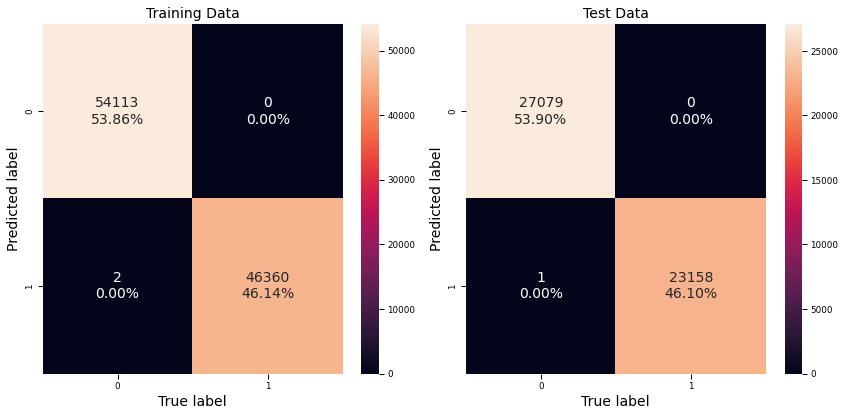

In [ ]:
  modelDM1 = DecisionTreeClassifier(criterion="gini", random_state=1, class_weight={0: 0.50, 1: 0.50})
  modelDM1.fit(X, Y)
  model_performance_classification("Default Decision Tree Classifier", modelDM1,True)


## Default Decision Tree Classifier

In [ ]:
"""
if BUILD_ALL==True or BUILD_DT==True:
  modelDM1 = DecisionTreeClassifier(criterion="gini", random_state=1, class_weight={0: 0.50, 1: 0.50})
  modelDM1.fit(X, Y)
  model_performance_classification("Default Decision Tree Classifier", modelDM1,True)

  """
"""
 # Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(criterion="gini", random_state=1, class_weight={0: 0.50, 1: 0.50})

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 10, 2),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15],
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X, Y)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X, Y) 
model_performance_classification(" Decision Tree Classifier", dtree_estimator,True)

"""

'\n # Choose the type of classifier.\ndtree_estimator = DecisionTreeClassifier(criterion="gini", random_state=1, class_weight={0: 0.50, 1: 0.50})\n\n# Grid of parameters to choose from\nparameters = {\n    "max_depth": np.arange(2, 10, 2),\n    "min_samples_leaf": [1, 2, 5, 7, 10],\n    "max_leaf_nodes": [2, 3, 5, 10, 15],\n    "min_impurity_decrease": [0.001, 0.01, 0.1],\n}\n\n# Type of scoring used to compare parameter combinations\nscorer = metrics.make_scorer(metrics.accuracy_score)\n\n# Run the grid search\ngrid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)\ngrid_obj = grid_obj.fit(X, Y)\n\n# Set the clf to the best combination of parameters\ndtree_estimator = grid_obj.best_estimator_\n\n# Fit the best algorithm to the data.\ndtree_estimator.fit(X, Y) \nmodel_performance_classification(" Decision Tree Classifier", dtree_estimator,True)\n\n'

In [ ]:
#plot_important_features(dtree_estimator)

## Tuned Decision Tree - Recall & Accuracy



In [ ]:
# BY recall_score
if BUILD_ALL==True or BUILD_TDTR==True:
    estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.50, 1: 0.50})

      # Grid of parameters to choose from
    parameters = {
          "max_depth": [5, 10, 15,20,25, 30,50,None],
          'min_samples_leaf': [5, 10, 20, 50, 100],
          "criterion": ["entropy", "gini"],
          "splitter": ["best", "random"],
          "min_impurity_decrease": [0.00001, 0.0001, 0.01],
      }


    # Type of scoring used to compare parameter combinations
    scorer = make_scorer(recall_score)
    #scorer = make_scorer(precision_score)
    #scorer = make_scorer(accuracy_score)

    # Run the grid search
    grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5, n_jobs=-1)
    grid_obj = grid_obj.fit(X_train, y_train)

    # Set the clf to the best combination of parameters
    estimator_recall = grid_obj.best_estimator_

    # Fit the best algorithm to the data.
    estimator_recall.fit(X_train, y_train)
    model_performance_classification("Tuned Decision Tree Classifier - Recall", estimator_recall)

In [ ]:
# BY accuracy_score
if BUILD_ALL==True or BUILD_TDTA==True:
    estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.46, 1: 0.54})

    # Grid of parameters to choose from
    parameters = {
        "max_depth": [5, 10, 15,20,25, 30,50,None],
        'min_samples_leaf': [5, 10, 20, 50, 100],
        "criterion": ["entropy", "gini"],
        "splitter": ["best", "random"],
        "min_impurity_decrease": [0.00001, 0.0001, 0.01],
    }


    # Type of scoring used to compare parameter combinations
    #scorer = make_scorer(recall_score)
    #scorer = make_scorer(precision_score)
    scorer = make_scorer(accuracy_score)

    # Run the grid search
    grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5, n_jobs=-1)
    grid_obj = grid_obj.fit(X_train, y_train)

    # Set the clf to the best combination of parameters
    estimator_accuracy = grid_obj.best_estimator_

    # Fit the best algorithm to the data.
    estimator_accuracy.fit(X_train, y_train)
    model_performance_classification("Tuned Decision Tree Classifier - Accuracy", estimator_accuracy)

# Default Bagging

In [ ]:

if BUILD_ALL==True or BUILD_B==True:
  bagging_wt_recall = BaggingClassifier(random_state=1)
  bagging_wt_recall.fit(X_train, y_train)
  model_performance_classification(
    "Bagging Classifier WT Decision Tree", bagging_wt_recall,True
  )


In [ ]:
if BUILD_ALL==True or BUILD_B==True:
  bagging_wt_accuracy = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.50,1:0.50},random_state=1),random_state=1)
  bagging_wt_accuracy.fit(X_train, y_train)
  model_performance_classification(
    "Bagging Classifier WT Decision Tree", bagging_wt_accuracy,True
  )

# Default Random Forest

Model 'Random Forest with wt' performance 





,Model,Data,# Records,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Random Forest with wt,Training,100475,99.998,99.998,99.998,99.998,99.998
1,Random Forest with wt,Test,50238,99.996,99.996,99.996,99.996,99.996





Total Training Failures : 2


Total Testing Failures : 2

Random 20 Failed Records From Training



,CollectionRatio,DebtBillingRatio,HasID,Value_Log,PropertySize_Log,BillingAmt_Log,AverageBillingAmt_Log,CollectedAmt_Log,AverageCollectedAmt_Log,DebtAmt_Log,WriteOffAmt_Log,TotalElectricityBill_Log,Category_Business,Category_Educational,Category_Environmental Management,Category_Government,Category_Industry,Category_Infrastructure,Category_Municipal,Category_Place of Worship,Category_Public Benefit,Category_Residential,Category_Unknown,Orig,Model,Model Name
44982,1.0,0.0,1,9.955178,5.484797,2.564949,0.693147,2.564949,1.945910,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,1,Random Forest with wt
60630,1.0,0.0,0,10.596660,7.303170,5.278115,5.278115,5.278115,4.189655,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,1,0,Random Forest with wt



Random 10 Failed Records From Testing



,CollectionRatio,DebtBillingRatio,HasID,Value_Log,PropertySize_Log,BillingAmt_Log,AverageBillingAmt_Log,CollectedAmt_Log,AverageCollectedAmt_Log,DebtAmt_Log,WriteOffAmt_Log,TotalElectricityBill_Log,Category_Business,Category_Educational,Category_Environmental Management,Category_Government,Category_Industry,Category_Infrastructure,Category_Municipal,Category_Place of Worship,Category_Public Benefit,Category_Residential,Category_Unknown,Orig,Model,Model Name
44982,1.0,0.0,1,9.955178,5.484797,2.564949,0.693147,2.564949,1.945910,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,1,Random Forest with wt
60630,1.0,0.0,0,10.596660,7.303170,5.278115,5.278115,5.278115,4.189655,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,1,0,Random Forest with wt


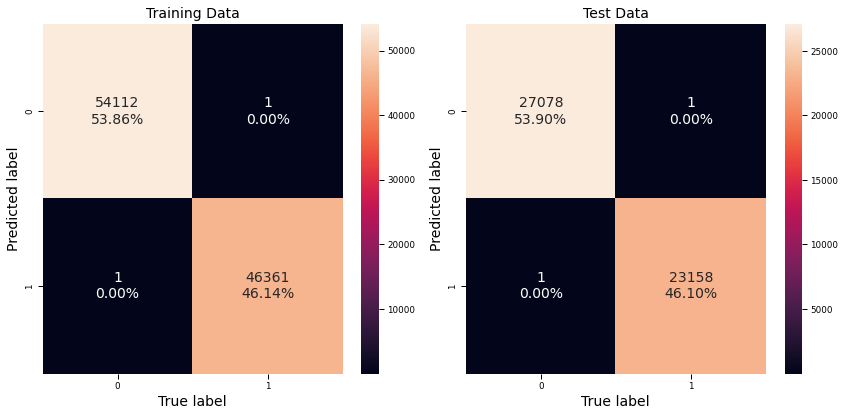

In [ ]:
if BUILD_ALL==True or BUILD_RT==True:
  rf_wt_recall = RandomForestClassifier(class_weight={0: 0.30, 1: 0.70}, random_state=1)
  rf_wt_recall.fit(X, Y)
  model_performance_classification("Random Forest with wt", rf_wt_recall,True)

Model 'Tuned Random Forest' performance 





,Model,Data,# Records,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Tuned Random Forest,Training,100475,99.996,99.998,99.998,100.0,99.998
1,Tuned Random Forest,Test,50238,99.996,99.998,99.998,100.0,99.998





Total Training Failures : 2


Total Testing Failures : 1

Random 20 Failed Records From Training



,CollectionRatio,DebtBillingRatio,HasID,Value_Log,PropertySize_Log,BillingAmt_Log,AverageBillingAmt_Log,CollectedAmt_Log,AverageCollectedAmt_Log,DebtAmt_Log,WriteOffAmt_Log,TotalElectricityBill_Log,Category_Business,Category_Educational,Category_Environmental Management,Category_Government,Category_Industry,Category_Infrastructure,Category_Municipal,Category_Place of Worship,Category_Public Benefit,Category_Residential,Category_Unknown,Orig,Model,Model Name
60630,1.0,0.0,0,10.596660,7.303170,5.278115,5.278115,5.278115,4.189655,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,1,0,Tuned Random Forest
82987,1.0,0.0,1,9.955178,5.484797,2.564949,0.693147,2.564949,1.945910,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,1,0,Tuned Random Forest



Random 10 Failed Records From Testing



,CollectionRatio,DebtBillingRatio,HasID,Value_Log,PropertySize_Log,BillingAmt_Log,AverageBillingAmt_Log,CollectedAmt_Log,AverageCollectedAmt_Log,DebtAmt_Log,WriteOffAmt_Log,TotalElectricityBill_Log,Category_Business,Category_Educational,Category_Environmental Management,Category_Government,Category_Industry,Category_Infrastructure,Category_Municipal,Category_Place of Worship,Category_Public Benefit,Category_Residential,Category_Unknown,Orig,Model,Model Name
60630,1.0,0.0,0,10.59666,7.30317,5.278115,5.278115,5.278115,4.189655,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,1,0,Tuned Random Forest


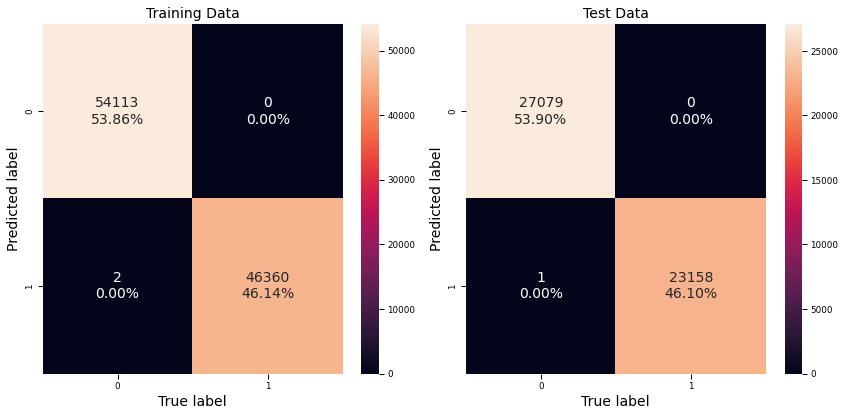

In [ ]:
if BUILD_ALL==True or BUILD_RT==True:
  # Choose the type of classifier. 
  rf_tuned = RandomForestClassifier(class_weight={0:0.50,1:0.50},random_state=1)

  # Grid of parameters to choose from
  parameters = {  
          "n_estimators": [200]
  }


  # Type of scoring used to compare parameter combinations
  scorer = metrics.make_scorer(metrics.accuracy_score)

  # Run the grid search
  grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
  grid_obj = grid_obj.fit(X, Y)

  # Set the clf to the best combination of parameters
  rf_estimator = grid_obj.best_estimator_

  # Fit the best algorithm to the data. 
  rf_estimator.fit(X, Y)

  model_performance_classification(
    "Tuned Random Forest", rf_estimator, True
)

In [ ]:
"""
if BUILD_ALL==True or BUILD_RT==True:
  # Choose the type of classifier. 
  rf_tuned = RandomForestClassifier(class_weight={0:0.50,1:0.50},random_state=1)

  # Grid of parameters to choose from
  parameters = {  
          "n_estimators": [200],
  }


  # Type of scoring used to compare parameter combinations
  scorer = metrics.make_scorer(metrics.precision_score)

  # Run the grid search
  grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
  grid_obj = grid_obj.fit(X, Y)

  # Set the clf to the best combination of parameters
  rf_estimator2 = grid_obj.best_estimator_

  # Fit the best algorithm to the data. 
  rf_estimator2.fit(X, Y)

  model_performance_classification(
    "Tuned Random Forest", rf_estimator2, True
)
  
  """

'\nif BUILD_ALL==True or BUILD_RT==True:\n  # Choose the type of classifier. \n  rf_tuned = RandomForestClassifier(class_weight={0:0.50,1:0.50},random_state=1)\n\n  # Grid of parameters to choose from\n  parameters = {  \n          "n_estimators": [200],\n  }\n\n\n  # Type of scoring used to compare parameter combinations\n  scorer = metrics.make_scorer(metrics.precision_score)\n\n  # Run the grid search\n  grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)\n  grid_obj = grid_obj.fit(X, Y)\n\n  # Set the clf to the best combination of parameters\n  rf_estimator2 = grid_obj.best_estimator_\n\n  # Fit the best algorithm to the data. \n  rf_estimator2.fit(X, Y)\n\n  model_performance_classification(\n    "Tuned Random Forest", rf_estimator2, True\n)\n  \n  '

In [ ]:
"""
if BUILD_ALL==True or BUILD_RT==True:
  # Choose the type of classifier. 
  rf_tuned = RandomForestClassifier(class_weight={0:0.50,1:0.50},random_state=1)

  # Grid of parameters to choose from
  parameters = {  
          "n_estimators": [200],
  }


  # Type of scoring used to compare parameter combinations
  scorer = metrics.make_scorer(metrics.accuracy_score)

  # Run the grid search
  grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
  grid_obj = grid_obj.fit(X, Y)

  # Set the clf to the best combination of parameters
  rf_estimator3 = grid_obj.best_estimator_

  # Fit the best algorithm to the data. 
  rf_estimator3.fit(X, Y)

  model_performance_classification(
    "Tuned Random Forest", rf_estimator3, True
)
  
  """

'\nif BUILD_ALL==True or BUILD_RT==True:\n  # Choose the type of classifier. \n  rf_tuned = RandomForestClassifier(class_weight={0:0.50,1:0.50},random_state=1)\n\n  # Grid of parameters to choose from\n  parameters = {  \n          "n_estimators": [200],\n  }\n\n\n  # Type of scoring used to compare parameter combinations\n  scorer = metrics.make_scorer(metrics.accuracy_score)\n\n  # Run the grid search\n  grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)\n  grid_obj = grid_obj.fit(X, Y)\n\n  # Set the clf to the best combination of parameters\n  rf_estimator3 = grid_obj.best_estimator_\n\n  # Fit the best algorithm to the data. \n  rf_estimator3.fit(X, Y)\n\n  model_performance_classification(\n    "Tuned Random Forest", rf_estimator3, True\n)\n  \n  '

In [ ]:
"""
if BUILD_ALL==True or BUILD_RT==True:
  # Choose the type of classifier. 
  rf_tuned = RandomForestClassifier(random_state=1)

  # Grid of parameters to choose from
  parameters = {  
          "n_estimators": [200],
  }


  # Type of scoring used to compare parameter combinations
  scorer = metrics.make_scorer(metrics.f1_score)

  # Run the grid search
  grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
  grid_obj = grid_obj.fit(X, Y)

  # Set the clf to the best combination of parameters
  rf_estimator4 = grid_obj.best_estimator_

  # Fit the best algorithm to the data. 
  rf_estimator4.fit(X, Y)

  model_performance_classification(
    "Tuned Random Forest", rf_estimator4, True
)
  """

'\nif BUILD_ALL==True or BUILD_RT==True:\n  # Choose the type of classifier. \n  rf_tuned = RandomForestClassifier(random_state=1)\n\n  # Grid of parameters to choose from\n  parameters = {  \n          "n_estimators": [200],\n  }\n\n\n  # Type of scoring used to compare parameter combinations\n  scorer = metrics.make_scorer(metrics.f1_score)\n\n  # Run the grid search\n  grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)\n  grid_obj = grid_obj.fit(X, Y)\n\n  # Set the clf to the best combination of parameters\n  rf_estimator4 = grid_obj.best_estimator_\n\n  # Fit the best algorithm to the data. \n  rf_estimator4.fit(X, Y)\n\n  model_performance_classification(\n    "Tuned Random Forest", rf_estimator4, True\n)\n  '

In [ ]:

#plot_important_features(rf_estimator4)


In [ ]:

"""
if BUILD_ALL==True or BUILD_RT==True:
  rf_wt_recall2 = RandomForestClassifier(n_estimators=100, random_state=10)
  rf_wt_recall2.fit(X_train, y_train)
  model_performance_classification("Random Forest with wt", rf_wt_recall2,True)
  """

'\nif BUILD_ALL==True or BUILD_RT==True:\n  rf_wt_recall2 = RandomForestClassifier(n_estimators=100, random_state=10)\n  rf_wt_recall2.fit(X_train, y_train)\n  model_performance_classification("Random Forest with wt", rf_wt_recall2,True)\n  '

In [ ]:
#plot_important_features(rf_wt_recall)

In [ ]:
"""
if BUILD_ALL==True or BUILD_RT==True:
  rf_wt_accuracy =  RandomForestClassifier(random_state=1, criterion='gini')
  rf_wt_accuracy.fit(X_train, y_train)
  model_performance_classification("Random Forest with wt", rf_wt_accuracy)
"""
"""
#Create a Gaussian Classifier
rf_wt_accuracy=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
rf_wt_accuracy.fit(X_train,y_train)

#y_pred=clf.predict(X_test)
model_performance_classification("Random Forest with wt", rf_wt_accuracy,True)
"""
"""
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
        "min_impurity_decrease": [0.001, 0.01, 0.1]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)
model_performance_classification(
    "Tuned Random Forest", rf_estimator
)
"""
"""
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, Y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

n_estimators = [5,10,15]

for val in n_estimators:
    rf_tuned = RandomForestClassifier(n_estimators= val, random_state=1)
    recallScore = cross_val_score(rf_tuned, X, Y, cv= kf, scoring="recall")
    precisionScore = cross_val_score(rf_tuned, X, Y, cv= kf, scoring="precision")
    accuracyScore = cross_val_score(rf_tuned, X, Y, cv= kf, scoring="accuracy")
    f1_macroScore = cross_val_score(rf_tuned, X, Y, cv= kf, scoring="f1_macro")
    print(f'Average score({val}): recallScore : {"{:.5f}".format(recallScore.mean())},precisionScore : {"{:.5f}".format(precisionScore.mean())},accuracyScore : {"{:.5f}".format(accuracyScore.mean())},f1_macroScore : {"{:.5f}".format(f1_macroScore.mean())}')
  """ 


'\nimport pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import KFold, StratifiedKFold, cross_val_score\nfrom sklearn import linear_model, tree, ensemble\n\nkf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)\n\ncnt = 1\n# split()  method generate indices to split data into training and test set.\nfor train_index, test_index in kf.split(X, Y):\n    print(f\'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}\')\n    cnt+=1\n\nn_estimators = [5,10,15]\n\nfor val in n_estimators:\n    rf_tuned = RandomForestClassifier(n_estimators= val, random_state=1)\n    recallScore = cross_val_score(rf_tuned, X, Y, cv= kf, scoring="recall")\n    precisionScore = cross_val_score(rf_tuned, X, Y, cv= kf, scoring="precision")\n    accuracyScore = cross_val_score(rf_tuned, X, Y, cv= kf, scoring="accuracy")\n    f1_macroScore = cross_val_score(rf_tuned, X, Y, cv= kf, scoring="f1_macro")\n    print(f\'Average score({val}): recallScore : {"{:.5f}".format(recallS

In [ ]:
#plot_important_features(rf_estimator)

In [ ]:
  """
  estimators = [('Default DT',modelDM1),('Default Random Forest - Rec',rf_wt_recall)]
  final_estimator = rf_wt_recall1
  stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)
  stacking_classifier.fit(X_train,y_train)  
  model_performance_classification(
    "Stacking Classifier", stacking_classifier
   )
  """

'\nestimators = [(\'Default DT\',modelDM1),(\'Default Random Forest - Rec\',rf_wt_recall)]\nfinal_estimator = rf_wt_recall1\nstacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)\nstacking_classifier.fit(X_train,y_train)  \nmodel_performance_classification(\n  "Stacking Classifier", stacking_classifier\n )\n'

In [ ]:
"""
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(
    class_weight={0: 0.45, 1: 0.55}, random_state=1, oob_score=True, bootstrap=True
)

parameters = {
    "max_depth": list(np.arange(5, 30, 5)) + [None],
    "max_features": [0.7, 0.9, "sqrt", "log2"],
    "n_estimators": np.arange(30, 110, 50),
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
    "max_samples": [0.7, 0.9, None],
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)
# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)
model_performance_classification(
    "Tuned Random Forest v2", rf_tuned
)
"""

'\n# Choose the type of classifier.\nrf_tuned = RandomForestClassifier(\n    class_weight={0: 0.45, 1: 0.55}, random_state=1, oob_score=True, bootstrap=True\n)\n\nparameters = {\n    "max_depth": list(np.arange(5, 30, 5)) + [None],\n    "max_features": [0.7, 0.9, "sqrt", "log2"],\n    "n_estimators": np.arange(30, 110, 50),\n    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],\n    "max_samples": [0.7, 0.9, None],\n}\n\n\n# Type of scoring used to compare parameter combinations\nscorer = metrics.make_scorer(metrics.recall_score)\n\n# Run the grid search\ngrid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)\ngrid_obj = grid_obj.fit(X_train, y_train)\n# Set the clf to the best combination of parameters\nrf_tuned = grid_obj.best_estimator_\n\n# Fit the best algorithm to the data.\nrf_tuned.fit(X_train, y_train)\nmodel_performance_classification(\n    "Tuned Random Forest v2", rf_tuned\n)\n'

In [ ]:
"""
create_validation_output(modelDM1,'modelDM1.csv')
create_validation_output(bagging_wt_recall,'bagging_wt_recall.csv')
create_validation_output(bagging_wt_accuracy,'bagging_wt_accuracy.csv')
create_validation_output(rf_wt_recall,'rf_wt_recall.csv')
create_validation_output(rf_wt_accuracy,'rf_wt_accuracy.csv')
"""
#create_validation_output(rf_wt_accuracy,'rf_wt_accuracy.csv')

create_validation_output(modelDM1,'modelDM1.csv')
create_validation_output(rf_wt_recall,'rf_wt_recall.csv')
create_validation_output(rf_estimator,'rf_estimator.csv')
#create_validation_output(rf_estimator2,'rf_estimator2.csv')
#create_validation_output(rf_estimator3,'rf_estimator3.csv')
#create_validation_output(rf_estimator4,'rf_estimator4.csv')
#create_validation_output(dtree_estimator,'dtree_estimator.csv')



generate output



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0    53.79333
1    46.20667
Name: Label, dtype: float64

generate output



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0    54.145642
1    45.854358
Name: Label, dtype: float64

generate output



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0    54.145642
1    45.854358
Name: Label, dtype: float64



# **Tuning Random Forest Classifier**

In [ ]:
if BUILD_ALL==True or BUILD_TRTR==True:
  # Choose the type of classifier. 
  rf_tuned = RandomForestClassifier(class_weight={0:0.50,1:0.50},random_state=1)

  # Grid of parameters to choose from
  parameters = {  
          "n_estimators": [10],
          "min_samples_leaf": np.arange(5, 100, 20),
          "max_features": [0.7,0.9,'log2','auto'],
          "max_samples": [0.7,0.9,None],
          "min_impurity_decrease": [0.001, 0.01, 0.1]
  }


  # Type of scoring used to compare parameter combinations
  scorer = metrics.make_scorer(metrics.recall_score)

  # Run the grid search
  grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
  grid_obj = grid_obj.fit(X_train, y_train)

  # Set the clf to the best combination of parameters
  rf_estimator = grid_obj.best_estimator_

  # Fit the best algorithm to the data. 
  rf_estimator.fit(X_train, y_train)
  model_performance_classification(
    "Tuned Random Forest", rf_estimator
  )

# Stacking All Models

In [ ]:

if BUILD_ALL==True or BUILD_STACK==True:
  estimators = [('Default LR',lg1),('Default DT',modelDM1), ('Tuned DT - Recall',estimator_recall), ('Tuned DT - Accuracy',estimator_accuracy),('Default Random Forest - Acc',rf_wt_accuracy) ,('Default Random Forest - Rec',rf_wt_recall) ,('Bagging Acc',bagging_wt_accuracy),('Bagging Recall',bagging_wt_recall)]
  final_estimator = rf_estimator
  stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)
  stacking_classifier.fit(X_train,y_train)  
  model_performance_classification(
    "Stacking Classifier", stacking_classifier
   )

# Download All Model Data

In [ ]:
if DOWNLOAD==True:
  create_validation_output(lg1,'lg1.csv')
  create_validation_output(modelDM1,'modelDM1.csv')
  create_validation_output(estimator_recall,'estimator_recall.csv')
  create_validation_output(estimator_accuracy,'estimator_accuracy.csv')
  create_validation_output(rf_wt_accuracy,'rf_wt_accuracy.csv')
  create_validation_output(rf_wt_recall,'rf_wt_recall.csv')
  create_validation_output(bagging_wt_accuracy,'bagging_wt_accuracy.csv')
  create_validation_output(bagging_wt_recall,'bagging_wt_recall.csv')
  create_validation_output(rf_estimator,'rf_estimator.csv')
  create_validation_output(stacking_classifier,'stacking_classifier.csv')


# Data Failed in all Models 



In [ ]:
#showDataFailedAllModels()

In [ ]:
if BUILD_ALL==True or BUILD_STACK==True:
  abc_tuned = AdaBoostClassifier(random_state=1)
  # Grid of parameters to choose from
  ## add from article
  parameters = {
      # Let's try different max_depth for base_estimator
      "base_estimator": [
          DecisionTreeClassifier(
              max_depth=1, random_state=45,
          ),
          DecisionTreeClassifier(
              max_depth=2, random_state=30,
          ),
      ],
      "n_estimators": np.arange(10, 30, 10),
      "learning_rate": np.arange(0.1, 1.1, 0.2),
  }
  acc_scorer = metrics.make_scorer(metrics.recall_score)
  # Run the grid search
  grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
  grid_obj = grid_obj.fit(X_train, y_train)

  # Set the clf to the best combination of parameters
  abc_tuned = grid_obj.best_estimator_

  # Fit the best algorithm to the data.
  abc_tuned.fit(X_train, y_train)

  model_performance_classification("Tuned AdaBoost", abc_tuned)

In [ ]:
#create_validation_output(abc_tuned,'abc_tuned.csv')

In [ ]:
if BUILD_ALL==True or BUILD_STACK==True:
  # Choose the type of classifier. 
  gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

  # Grid of parameters to choose from
  parameters = {
      "n_estimators": [10],
      "subsample":[0.8,0.9,1],
      "max_features":[0.7,0.8,0.9,1]
  }

  # Type of scoring used to compare parameter combinations
  scorer = metrics.make_scorer(metrics.f1_score)

  # Run the grid search
  grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
  grid_obj = grid_obj.fit(X_train, y_train)

  # Set the clf to the best combination of parameters
  gbc_tuned = grid_obj.best_estimator_

  # Fit the best algorithm to the data.
  gbc_tuned.fit(X_train, y_train)
  model_performance_classification("Tuned GradientBoostin", gbc_tuned)

In [ ]:
#create_validation_output(gbc_tuned,'gbc_tuned.csv')

In [ ]:
if BUILD_ALL==True or BUILD_STACK==True:
  estimators = [('boosting abc',abc_tuned),('boosting gbc',gbc_tuned)]
  final_estimator = stacking_classifier
  stacking_classifier_boost= StackingClassifier(estimators=estimators,final_estimator=final_estimator)
  stacking_classifier_boost.fit(X_train,y_train)  
  model_performance_classification(
    "Stacking Classifier", stacking_classifier_boost
   )